In [34]:
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Perceptron
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder, label_binarize
import pandas as pd
import numpy as np

Zadanie 1

In [35]:
X, y = make_classification(n_classes=4, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_samples=2000, random_state=6788)

Zadanie 2

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4912)

Zadanie 3

In [37]:
classifiers_ovo = [
    OneVsOneClassifier(SVC(kernel='linear', probability=True)),
    OneVsOneClassifier(SVC(kernel='rbf', probability=True)),
    OneVsOneClassifier(LogisticRegression()),
    OneVsOneClassifier(Perceptron())
]

In [38]:
classifiers_ovr = [
    OneVsRestClassifier(SVC(kernel='linear', probability=True)),
    OneVsRestClassifier(SVC(kernel='rbf', probability=True)),
    OneVsRestClassifier(LogisticRegression()),
    OneVsRestClassifier(Perceptron())
]

Zadanie 4

In [39]:
def wizualizacje(classifiers_list, typ="ovo"):
    accuracy_scores = []
    recall_scores = []
    precision_scores = []
    F1_scores = []
    roc_auc_scores = []
    y_pred_list = []

    df = pd.DataFrame(columns=["strategy", "classifier", "accuracy_score", "recall_score", "precision_score", "F1_score", "roc_auc"])
    for i, clf in enumerate(classifiers_list):
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        y_pred_list.append(y_pred)

        correct = X_test[y_test == y_pred]
        incorrect = X_test[y_test != y_pred]

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        ax1.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.7)
        ax2.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, alpha=0.7)

        ax3.scatter(correct[:, 0], correct[:, 1], c="mediumseagreen", alpha=0.8, label="Poprawne")
        ax3.scatter(incorrect[:, 0], incorrect[:, 1], c="crimson", alpha=0.8, label="Błędne")

        ax1.set_title('oczekiwane')
        ax2.set_title('obliczone')
        ax3.set_title('różnice');

        # Parametr average jest wymagany w przypadku klasyfikacji wieloklasowej
        # macro - oblicza średnią dla ze wskaźników dla każdej etykiety
        _accuracy_score = accuracy_score(y_test, y_pred)
        accuracy_scores.append(_accuracy_score)
        _recall_score = recall_score(y_test, y_pred, average="macro")
        recall_scores.append(_recall_score)
        _precision_score = precision_score(y_test, y_pred, average="macro")
        precision_scores.append(_precision_score)
        _f1_score = f1_score(y_test, y_pred, average="macro")
        F1_scores.append(_f1_score)

        # Przekształca zmienne jakościowe na binarną reprezentację wektorową, wartość 1 wskazuje przynależność do danej klasy, a wartość 0 oznacza brak przynależności, binarna reprezentacja jets potrzebna
        # do obliczenia roc auc score
        encoder = OneHotEncoder(sparse_output=False)
        y_pred_encoded = encoder.fit_transform(y_pred.reshape(-1, 1))
        y_test_encoded = encoder.transform(y_test.reshape(-1, 1))

        _roc_auc_score = roc_auc_score(y_test_encoded, y_pred_encoded)
        roc_auc_scores.append(_roc_auc_score)

        fig.suptitle(f"{clf.__class__.__name__} estymator: {clf.estimator.__class__.__name__}")

        dict_data = {
            'strategy': clf.__class__.__name__,
            'classifier': clf.estimator.__class__.__name__,
            'accuracy_score': _accuracy_score,
            'recall_score': _recall_score,
            'precision_score': _precision_score,
            'F1_score': _f1_score,
            'roc_auc': _roc_auc_score,
        }

        df_dict = pd.DataFrame(dict_data, index=[i])

        df = pd.concat([df, df_dict])

    return accuracy_scores, recall_scores, precision_scores, roc_auc_scores, y_pred_list, df

,strategy,classifier,accuracy_score,recall_score,precision_score,F1_score,roc_auc
0,OneVsOneClassifier,SVC,0.917,0.915574,0.917403,0.916207,0.943960
1,OneVsOneClassifier,SVC,0.918,0.916570,0.917552,0.916902,0.944632
2,OneVsOneClassifier,LogisticRegression,0.916,0.914638,0.917763,0.915534,0.943328
3,OneVsOneClassifier,Perceptron,0.849,0.848672,0.864184,0.850268,0.899218


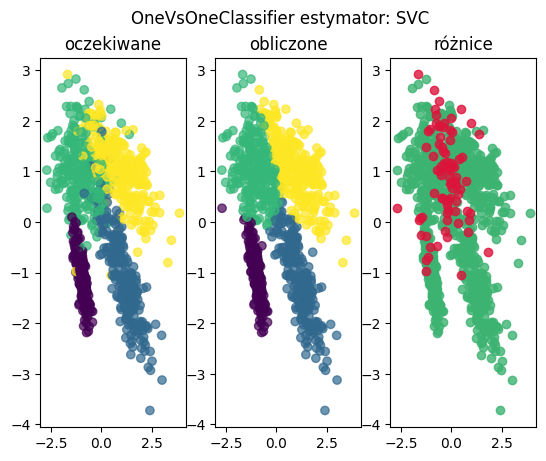

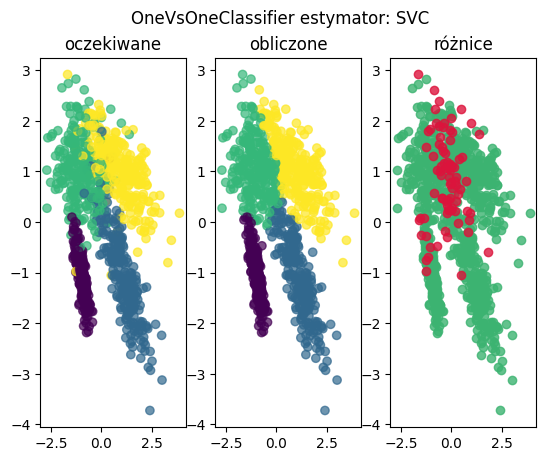

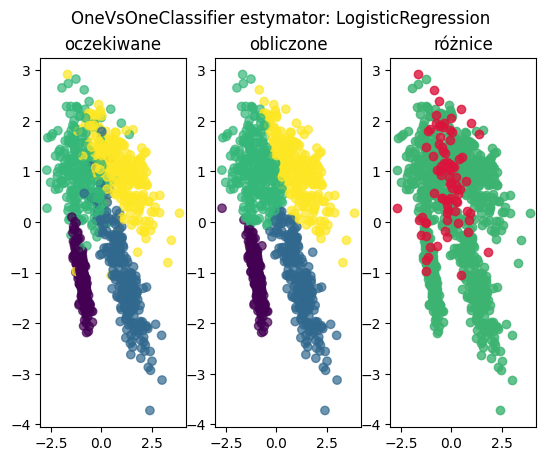

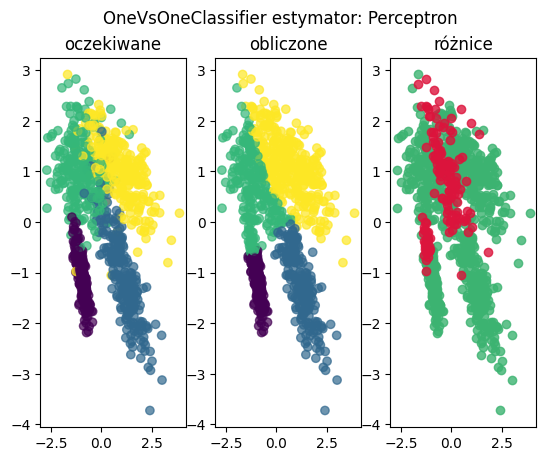

In [40]:
ovo_accuracy, ovo_recall, ovo_precision, ovo_roc_auc, ovo_pred_list, df_ovo = wizualizacje(classifiers_ovo)
df_ovo

,strategy,classifier,accuracy_score,recall_score,precision_score,F1_score,roc_auc
0,OneVsRestClassifier,SVC,0.908,0.906207,0.911421,0.907541,0.937774
1,OneVsRestClassifier,SVC,0.916,0.914736,0.914928,0.914774,0.943402
2,OneVsRestClassifier,LogisticRegression,0.913,0.911500,0.915984,0.912609,0.941254
3,OneVsRestClassifier,Perceptron,0.813,0.810698,0.872336,0.796492,0.874221


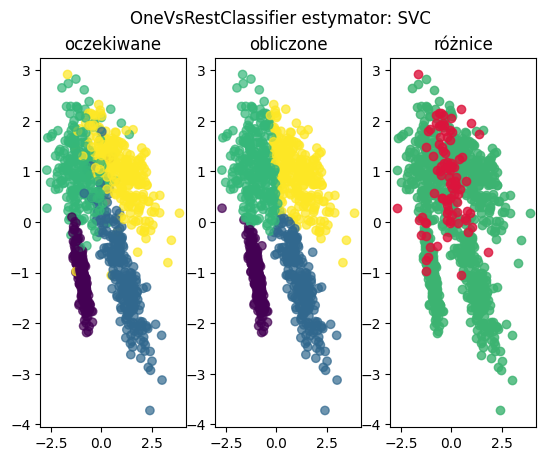

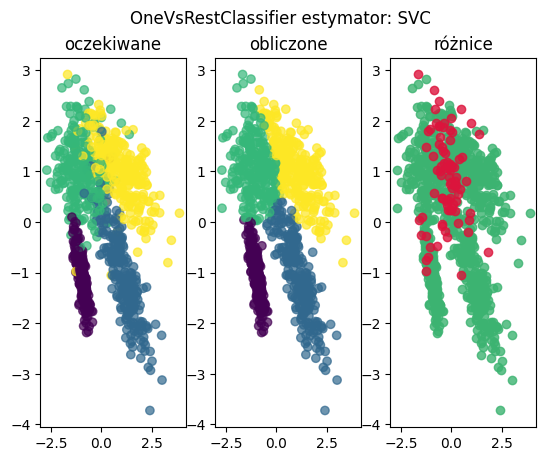

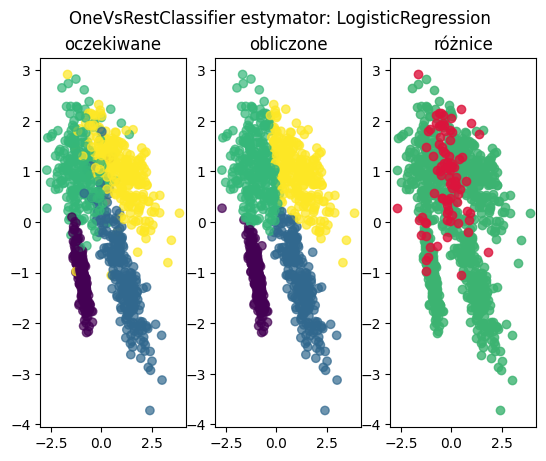

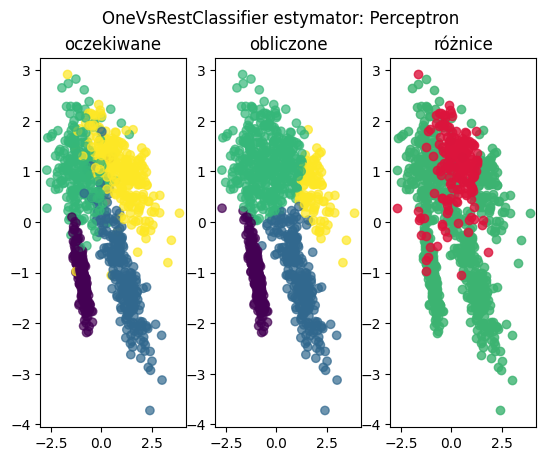

In [41]:
ovr_accuracy, ovr_recall, ovr_precision, ovr_roc_auc, ovr_pred_list, df_ovr = wizualizacje(classifiers_ovr, "ovr")
df_ovr

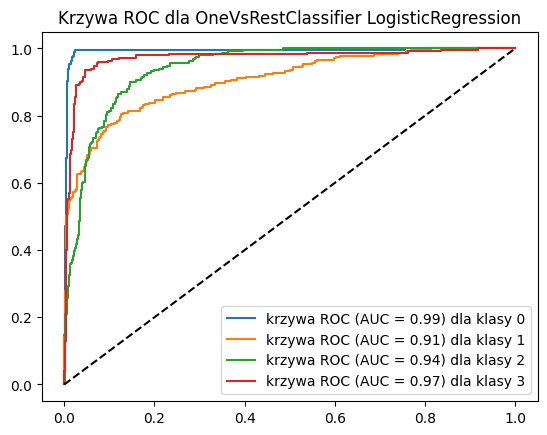

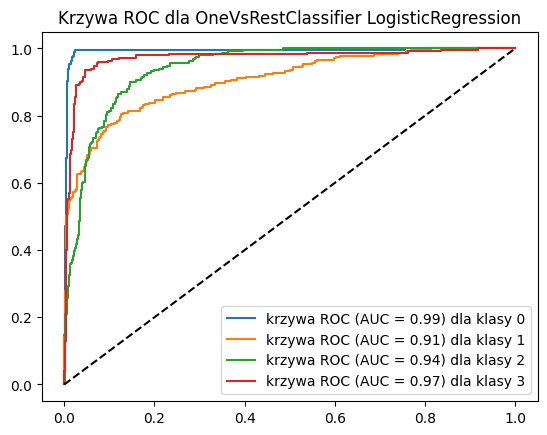

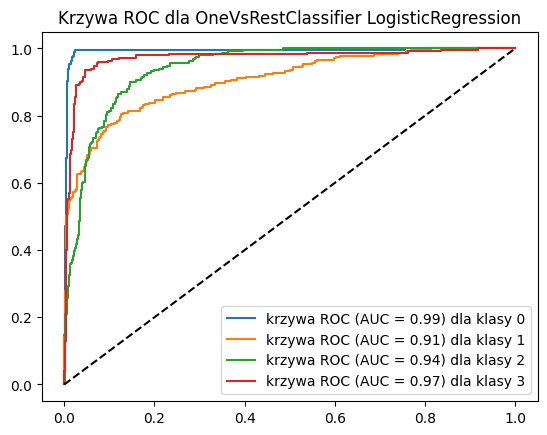

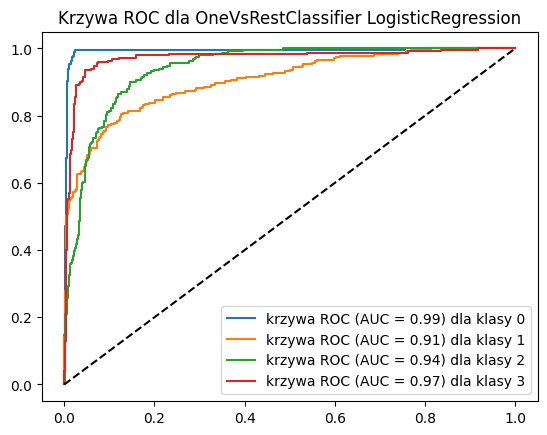

In [42]:
# Przekształcanie wektora etykiet [0,1,2,3] - takie zostały utworzone z make_classification na macierz binarną gdzie każda kolumna oznacza jedną klasę a wartości 1 lub 0 oznaczają to czy dany obiekt nalezy do klasy, czy
_y = label_binarize(y, classes=[0, 1, 2, 3])

X_train, X_test, y_train, y_test = train_test_split(X, _y, test_size=0.5, random_state=4912)

for clf in classifiers_ovr:
    clf = classifiers_ovr[2]

    # decision function do generowania funkcji decyzyjnej dopasowanej do modelu, ponieważ ovo i ovr nie mają metod predict_proba
    y_score = clf.fit(X_train, y_train).decision_function(X_test)

    for i in range(4):
        fpr, tpr, thresholds = roc_curve(y_test[:, i], y_score[:, i])

        plt.plot(fpr, tpr, label=f"krzywa ROC (AUC = {round(auc(fpr, tpr), 2)}) dla klasy {i}")

    plt.legend()
    plt.plot([0, 1], [0, 1], linestyle='--', color='k')
    plt.title(f"Krzywa ROC dla {clf.__class__.__name__} {clf.estimator.__class__.__name__}");
    plt.show()

Dla pewnych klas wskażnik AUC jest większy niz 0.95 a dla innych mniejszy niż 0.9 ponieważ klasy został← mocniej odseparowane przez klasyfikator, im bardziej klasy na siebie nachodzą tym AUC może być mniejszy.
Klasy mogą mieć różną ilość próbek - większa ilość próbek może mieć wpływ na  większą wartość AUC

Klasyfikatory SVC(linear), LogisticRegression, perceptron, SVC(rbf) nie

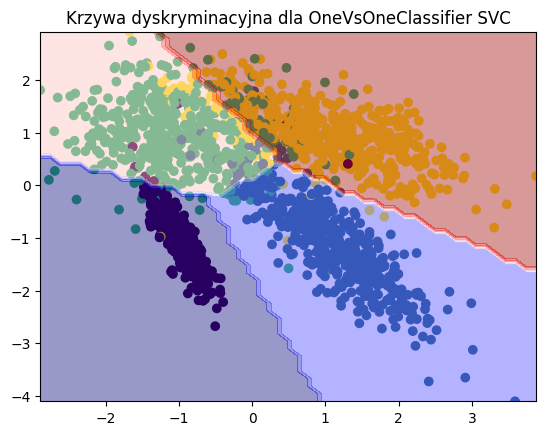

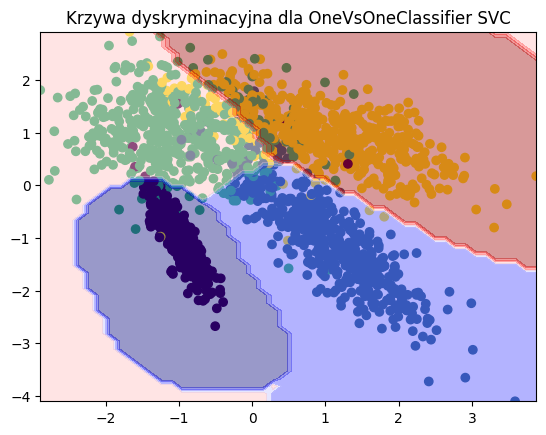

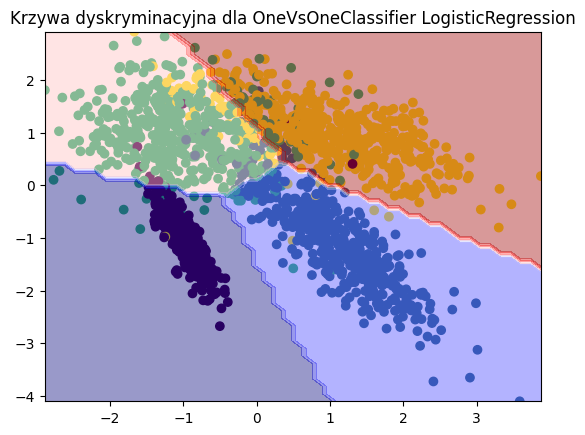

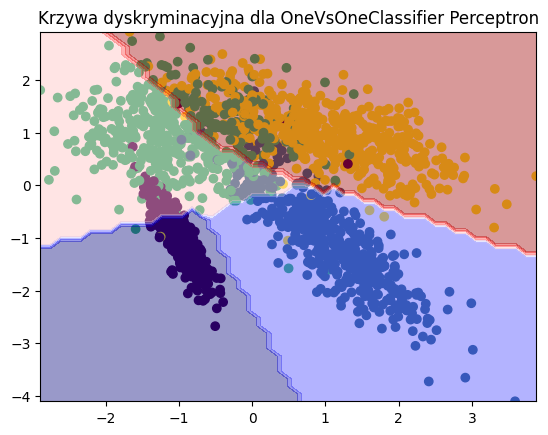

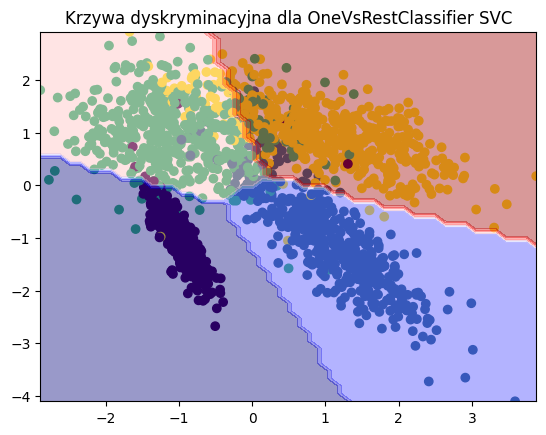

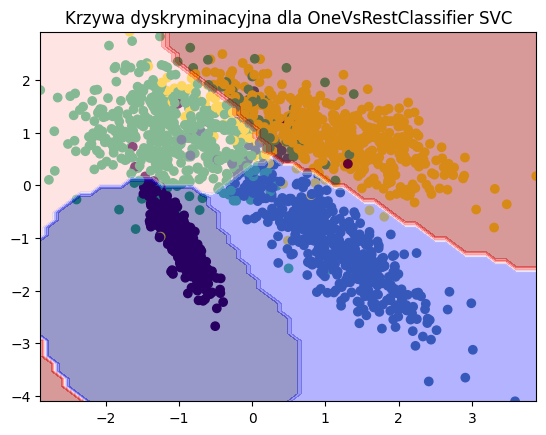

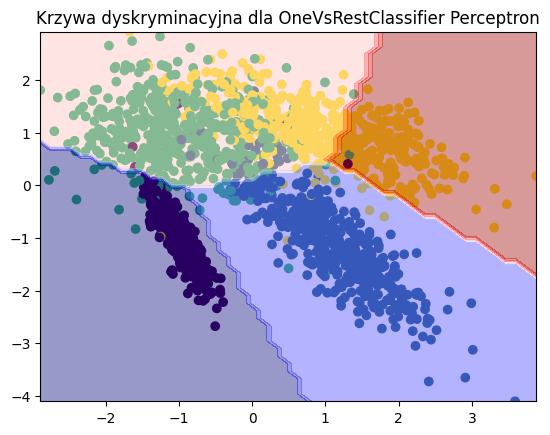

In [43]:
x_ = np.linspace(np.amin(X[:, 0]), np.amax(X[:, 0]))
y_ = np.linspace(np.amin(X[:, 1]), np.amax(X[:, 1]))
xv, yv = np.meshgrid(x_, y_)
mesh_flat = np.vstack((xv.ravel(), yv.ravel())).T

for clf in classifiers_ovo:
    Z = clf.predict(mesh_flat)
    Z = Z.reshape(xv.shape)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(f"Krzywa dyskryminacyjna dla {clf.__class__.__name__} {clf.estimator.__class__.__name__}");
    plt.contourf(xv, yv, Z, cmap='seismic', alpha=.4)
    plt.show()

for clf in [classifiers_ovr[i] for i in [0,1,3]]:
    Z = clf.predict(mesh_flat)
    Z = Z.reshape(xv.shape)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title(f"Krzywa dyskryminacyjna dla {clf.__class__.__name__} {clf.estimator.__class__.__name__}");
    plt.contourf(xv, yv, Z, cmap='seismic', alpha=.4)
    plt.show()

Zadanie 5

/tmp/ipykernel_5621/2170052639.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.plot(kind='bar', rot=90).legend(bbox_to_anchor=(1, 1));


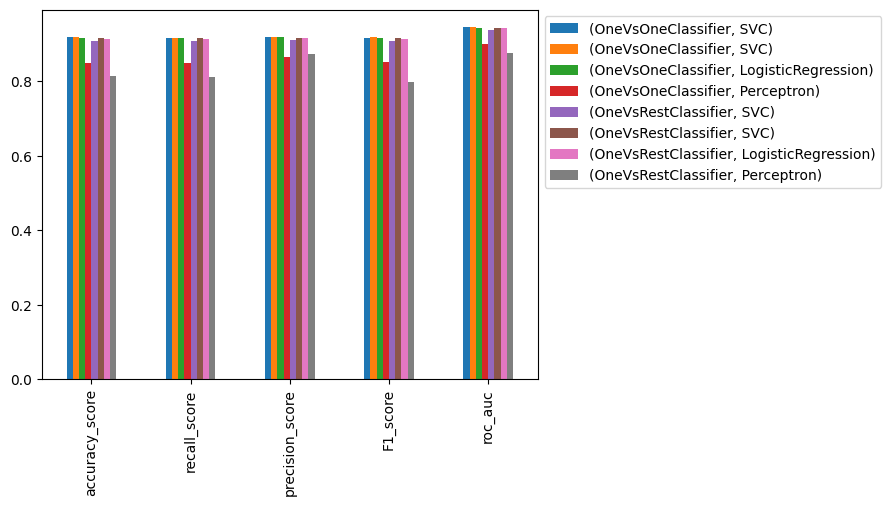

In [44]:
df = pd.concat([df_ovo, df_ovr])
df = df.set_index(['strategy', 'classifier']).T
df.plot(kind='bar', rot=90).legend(bbox_to_anchor=(1, 1));